##                     Prédiction du désabonnement des clients de l'entreprise de télécom 

Objectif : construire un modèle de machine learning capable de prédire le desabonnement d'un client.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer,StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 


import joblib




**Injection des données**

In [5]:
df =pd.read_csv("./data/data_test_telecom.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Notre variable cible est la colonne **churn**  
No: pour un client toujours abonné\
Yes : pour un client desabonnée 

In [6]:
#Structure de la dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


La colonne **customerID** permet d'identifier de manière unique les lignes du dataset.

In [7]:
#Suppression de la colonne customerID 

df.drop(columns='customerID',axis=1,inplace=True)

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Vérification de la frequence de la variable cible 

In [9]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [10]:
#Transformation de la variable cible en une variable numérique 
df['Churn']=df['Churn'].apply(lambda row: 0 if row=="No" else 1 )

In [11]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [12]:
#Types des colonnes du dataset
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [13]:
#Vérification des valeurs nulles 

df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Division des données en données d'entraînement, validation et de test

In [14]:
seed=111
train, test = train_test_split(df,test_size=0.3,random_state=seed,stratify=df['Churn'])
test,validate= train_test_split(test,test_size=0.5,stratify=test['Churn'],random_state=seed)


print("train data: ", train.shape)
print("test data : ",test.shape)
print("validate data : ", validate.shape)

train data:  (4930, 20)
test data :  (1056, 20)
validate data :  (1057, 20)


In [15]:
#Vérification de la distribution des données de la variable cible 
train['Churn'].value_counts(normalize=True)

Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64

In [16]:
test['Churn'].value_counts(normalize=True)

Churn
0    0.734848
1    0.265152
Name: proportion, dtype: float64

In [17]:
validate['Churn'].value_counts(normalize=True)

Churn
0    0.734153
1    0.265847
Name: proportion, dtype: float64

Enregistrement des ensemble de données : validation, entraînement et test  
pour faire la version des données

In [18]:
train.to_csv('./data/train.csv',index=False)
test.to_csv('./data/test.csv',index=False)
validate.to_csv('./data/validate.csv',index=False)


## **Analyse exploiratoire des données**

In [19]:
#Création d'une copie de données d'entraînement 
train_copy=train.copy()

In [20]:
#Résumé statistique
train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,4930.0,0.164097,0.370401,0.00,0.00,0.0,0.0,1.00
tenure,4930.0,32.493712,24.493532,0.00,9.00,29.0,56.0,72.00
MonthlyCharges,4930.0,64.811856,30.064001,18.25,35.65,70.5,89.9,118.75
Churn,4930.0,0.265314,0.441545,0.00,0.00,0.0,1.0,1.00


L'analyse exploiration consistera à visualiser la distribution des variables quantitative à l'aide des historisgrammes et celles des variables qualitatives à l'aide des diagrammes à barres. Nous allons ajouter une carte de correlation pour analyser les relations entres les variables et la variable cible

In [21]:
#Variables quantitatives 
quant_cols=train_copy.select_dtypes(exclude='object').columns.to_list()
quant_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']

In [22]:
#Variables qualitatives
cat_cols=train_copy.select_dtypes(include='object').columns.to_list()
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

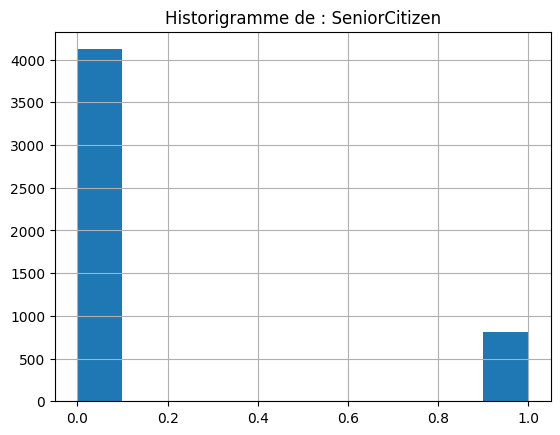

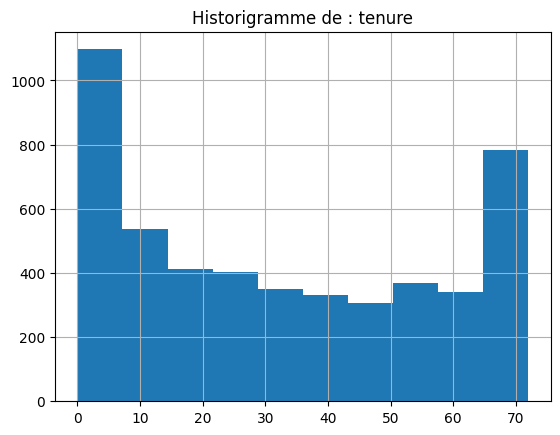

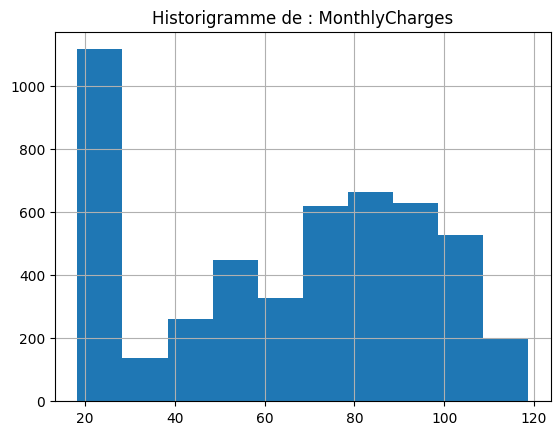

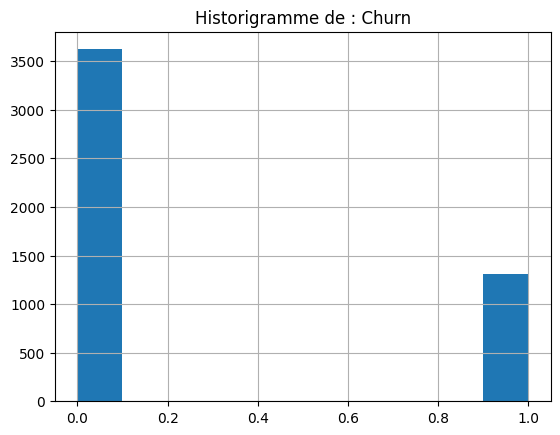

In [23]:
#Diagramme à barre de chaque variable quantitative

for col in quant_cols:
    train_copy[col].hist()
    plt.title("Historigramme de : "+ col)
    plt.show()
    plt.close()

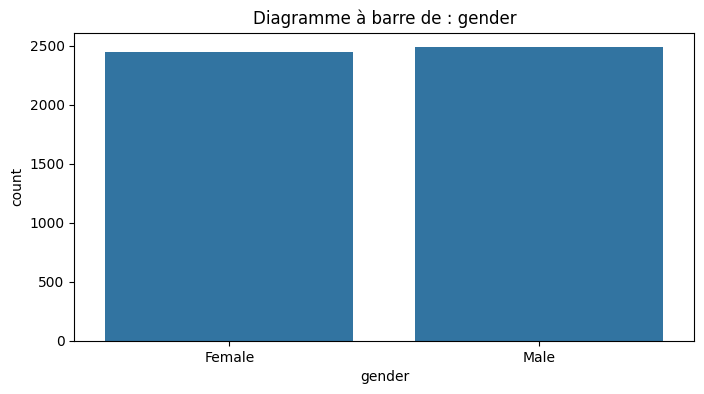

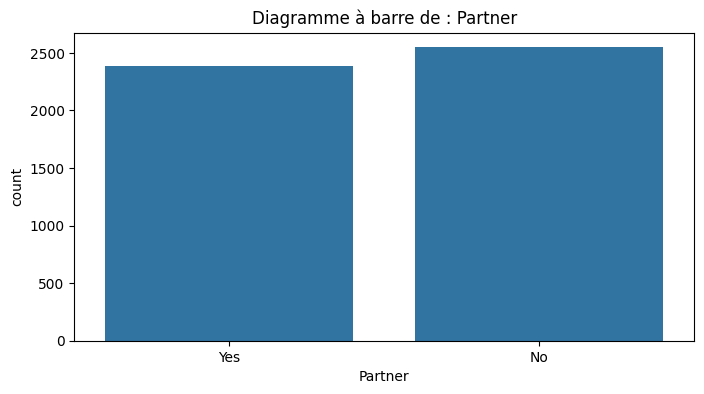

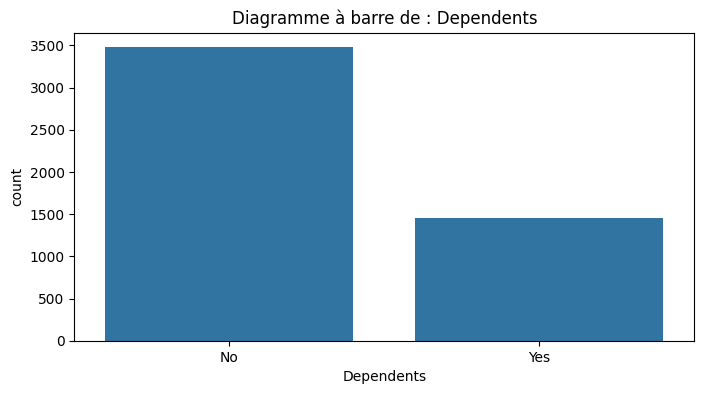

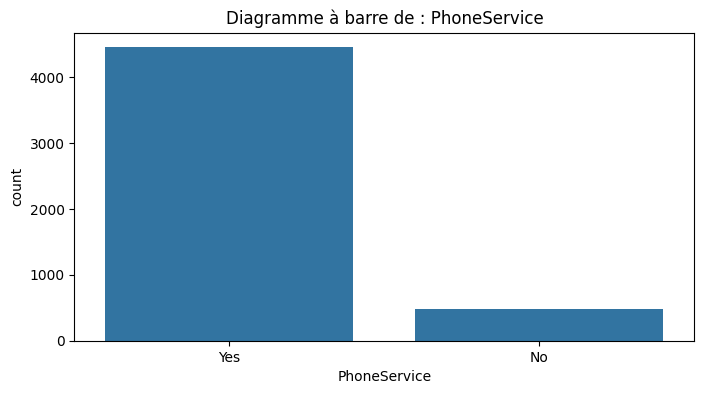

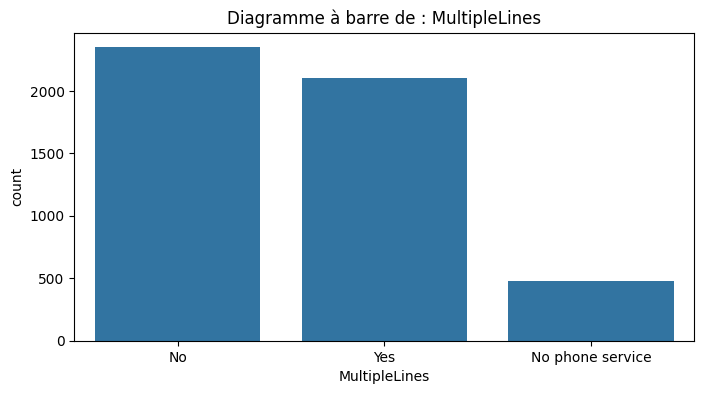

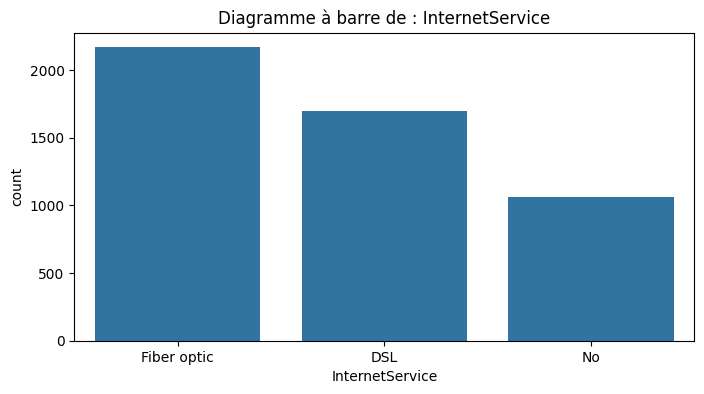

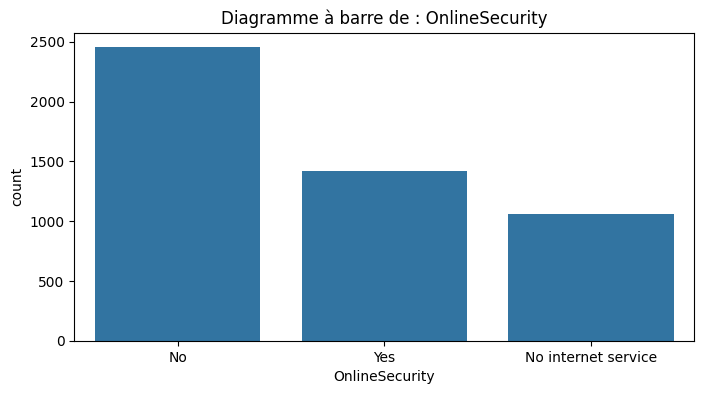

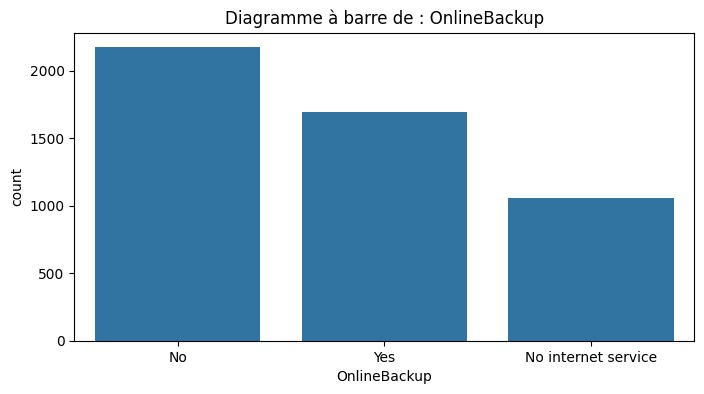

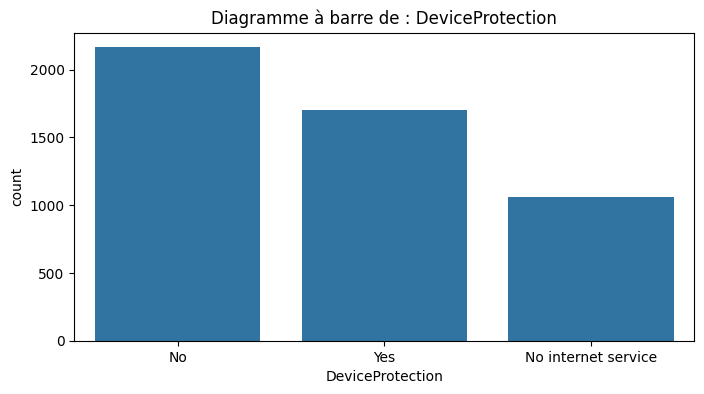

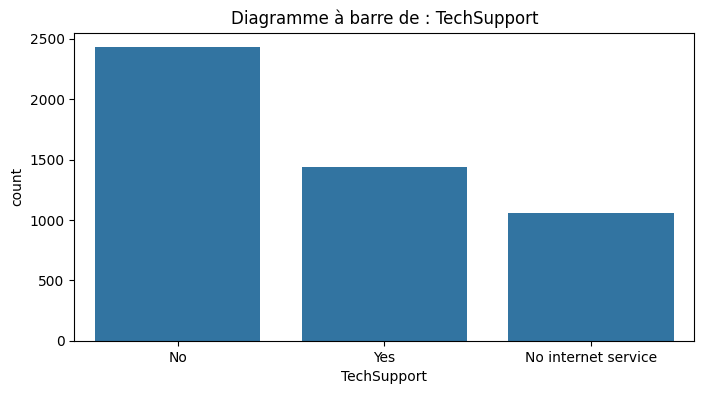

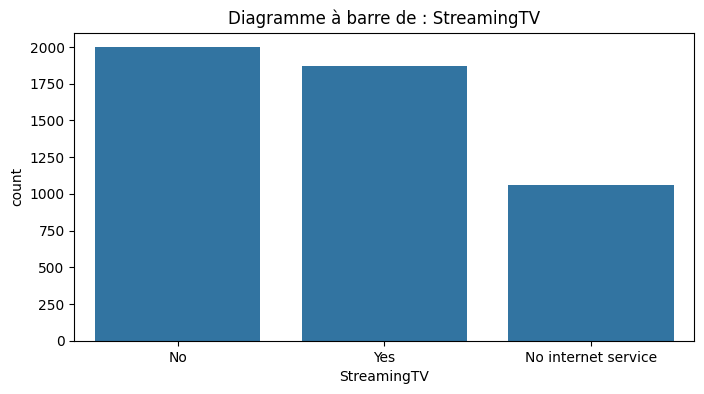

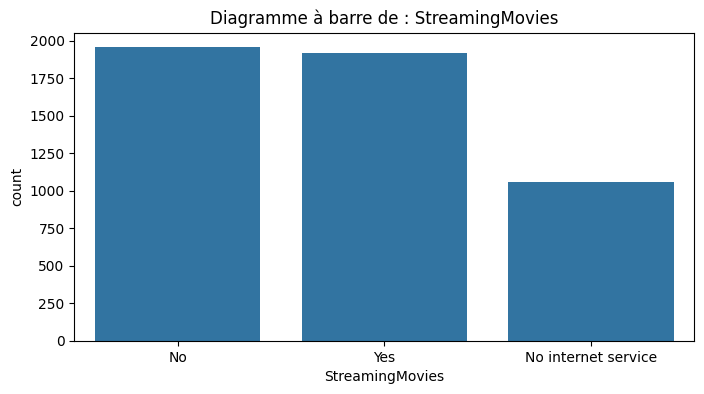

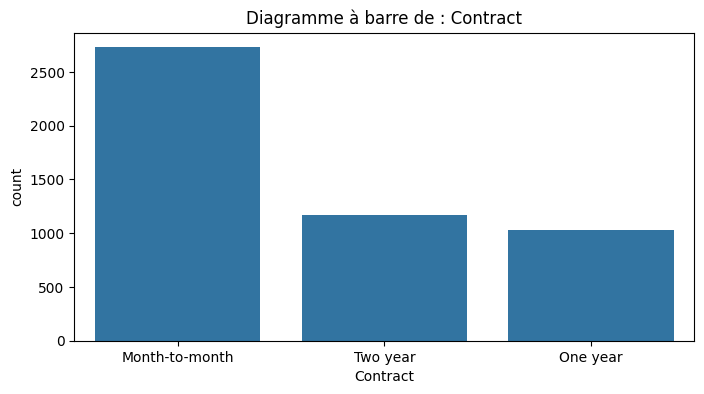

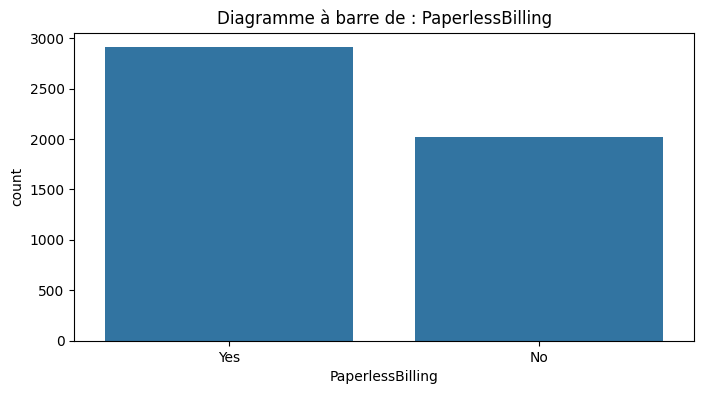

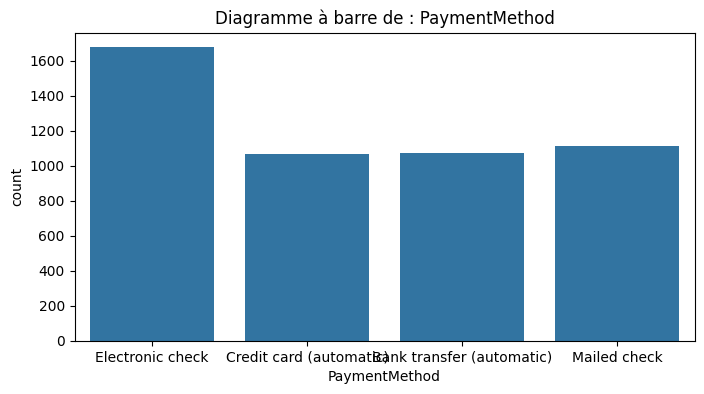

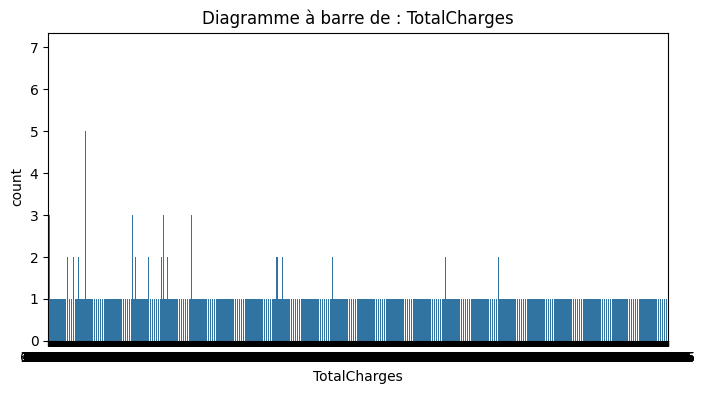

In [24]:
#Diagramme à barre de chaque variable catégorielle 

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=train_copy, x=col)
    plt.title("Diagramme à barre de : "+ col)
    plt.show()
    plt.close()


Nous constatons une anormalie dans la variable TotalCharges 

In [25]:
#Afficher le contenu de la variable TotalCharges 
train_copy['TotalCharges']

313       341.6
1893     1083.7
4205    1846.65
5962     1321.3
3257     2157.3
         ...   
5536      296.1
3785      914.3
4309     1073.3
6418       2484
5060      607.3
Name: TotalCharges, Length: 4930, dtype: object

Nous constatons que cette variable est de type numérique mais pandas nous dit qu'elle est de type object 

In [26]:
#Matrice de corrélation 
train_corr=train_copy.corr(numeric_only=True)
train_corr

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.021168,0.224429,0.153028
tenure,0.021168,1.000000,0.247532,-0.344565
MonthlyCharges,0.224429,0.247532,1.000000,0.190061
Churn,0.153028,-0.344565,0.190061,1.000000


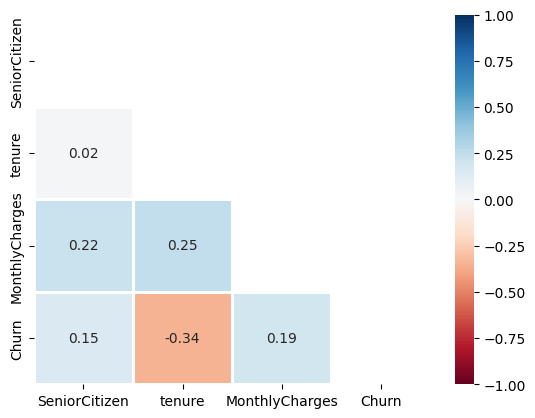

In [27]:
#Carte de corrélation 
sns.heatmap(
    train_corr,
    mask=np.triu(np.ones_like(train_corr,dtype=bool)),
    center=0,cmap='RdBu',linewidths=1,annot=True,
    fmt='.2f',vmin=-1,vmax=1
)
plt.show()
plt.close()


## **Prétraitement des données**

Cette etape va consister à gérer les problèmes relevés lors de l'analyser exploiratoire :\
Gérer les valeurs manquantes\
transformer types de variables exact\
Encoder les variables catégorielle\
Standardiser les variables quantitatives

Traitons le cas de la variables TotalCharges 

In [28]:
#Forcer la conversion numérique de la varible TotalChages 
#Les variables qui ne seront pas converties seront transformées en Nan
total_charges=pd.to_numeric(train_copy['TotalCharges'],errors='coerce')
total_charges.isna().sum()

7

In [29]:
#Valeurs qui posent problème
train_copy[total_charges.isna()]['TotalCharges'].unique()

array([' '], dtype=object)

Nous constatons que dans les valeurs de la variable TotalCharges nous avons des espace vide qui sont considérer comme des caractères 

#### Nous allons créer le **Piple** de prétraitement pour notre modélisation 

In [30]:
#Fonction pour convertir la variable TotalCharges 
#Cette fonction prend en entré un dataFrame, converti la colonne TotalCharges en type numérique 
#et retourne un tableau numpy
def convert_TotalCharges(data):
    data_copy=data.copy()
    data_copy['TotalCharges']=pd.to_numeric(data_copy['TotalCharges'],errors='coerce')
    return data_copy.values

Etapes du piple  de prétraitement des données : 
* Conversion de la variable TotalCharges en variable numérique 
* Gestion des valeurs manquantes de la variable TotalCharges 
* Standardisations des variables indépendantes(features) numériques
* Encodage des variables indépendantes qualitatives 




Listes des variables indépendantes numériques et qualitatives 

In [31]:
numeric_features=quant_cols[:-1]+['TotalCharges']
numeric_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [32]:
categorical_features=cat_cols[:-1]
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [33]:
#Piple de prétraitement des variables indépendantes numériques 
numeric_transformer=Pipeline(
    steps=[('convert',FunctionTransformer(convert_TotalCharges)),
           ('imputer',SimpleImputer(strategy='median')),
           ('scaler',StandardScaler())]
)

#Pipple de prétraitement des variables  catégorielle 
categorical_transformer=Pipeline(
    steps=[('oneHotEncoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))]
)

#Cncatenation des deux piples
preprocessor=ColumnTransformer(
    transformers=[('numeric',numeric_transformer,numeric_features),
                  ('categorical',categorical_transformer,categorical_features)]
)

print(preprocessor)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('convert',
                                                  FunctionTransformer(func=<function convert_TotalCharges at 0x73ad2d8be320>)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('categorical',
                                 Pipeline(steps=[('oneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService

In [34]:
preprocessor

,transformers,"[('numeric', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,func,<function con...x73ad2d8be320>
,inverse_func,None
,validate,False


## **Modélisation**

In [35]:
#Piple de modélisation avec estimateur RandomForestClassifier : Forêt aleatoire 
rf_piple_model=Pipeline(
    steps=[('preprocessor',preprocessor),
           ('rf',RandomForestClassifier(random_state=seed))]
)

rf_piple_model

,steps,"[('preprocessor', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
#Piple de modélisation avec estimateur LogisticRegression 

lg_piple_model=Pipeline(
    steps=[('preprocessor',preprocessor),
           ('log_reg',LogisticRegression(random_state=seed,max_iter=2000))]
)

lg_piple_model

,steps,"[('preprocessor', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [37]:
x_train,y_train,x_val,y_val=train.drop(columns='Churn',axis=1),train['Churn'],validate.drop(columns='Churn',axis=1),validate['Churn']
print(x_train.shape,y_train.shape,x_val.shape, y_val.shape, '\n')

(4930, 19) (4930,) (1057, 19) (1057,) 



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3622
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



              precision    recall  f1-score   support

           0       0.83      0.91      0.87       776
           1       0.66      0.47      0.55       281

    accuracy                           0.79      1057
   macro avg       0.74      0.69      0.71      1057
weighted avg       0.78      0.79      0.78      1057



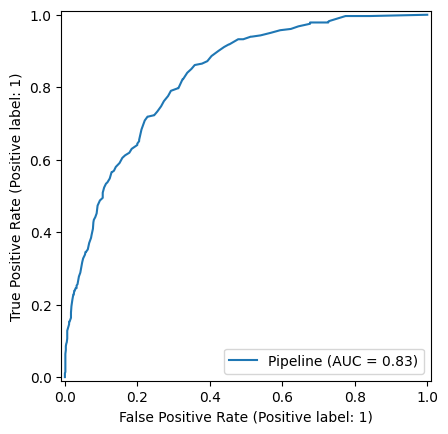

In [38]:
#Entrainement du modèle de forêt aléatoire 
rf_piple_model.fit(x_train,y_train)

#prédiction sur les données d'entrainement
y_train_predict_rf=rf_piple_model.predict(x_train)

#prédiction sur les données de validation 
x_val_predict_rf=rf_piple_model.predict(x_val)


#Rapport de classification 
print(classification_report(y_train,y_train_predict_rf))
print('\n')
print(classification_report(y_val,x_val_predict_rf))

#Courbe de ROC
rf_roc= RocCurveDisplay.from_estimator(rf_piple_model,x_val,y_val)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3622
           1       0.66      0.55      0.60      1308

    accuracy                           0.81      4930
   macro avg       0.75      0.72      0.74      4930
weighted avg       0.80      0.81      0.80      4930



              precision    recall  f1-score   support

           0       0.84      0.90      0.86       776
           1       0.64      0.52      0.57       281

    accuracy                           0.79      1057
   macro avg       0.74      0.71      0.72      1057
weighted avg       0.78      0.79      0.79      1057



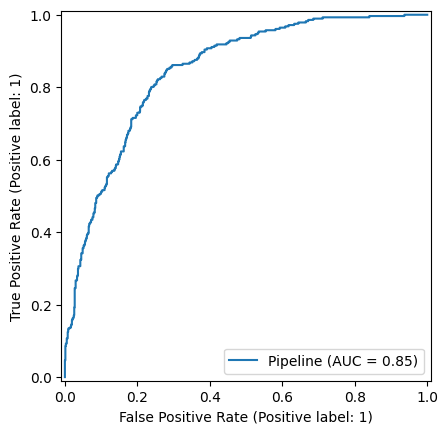

In [39]:
#Entrainement du modèle avec l'estimateur LogisticRegression 
lg_piple_model.fit(x_train,y_train)

#Prédiction avec les données d'entrainement 
loreg_predict_train=lg_piple_model.predict(x_train)

#Prédiction avec les données de validation 

logreg_predict_val=lg_piple_model.predict(x_val)

#Rapport de classification
print(classification_report(y_train,loreg_predict_train))
print('\n')
print(classification_report(y_val,logreg_predict_val))


#Courbe de ROC 
logreg_roc = RocCurveDisplay.from_estimator(lg_piple_model,x_val,y_val)




Nous constatons que la regession logistique est le meilleur modèle parmi les deux 

## Reglage des hyperparamètres du modèle 

In [40]:
#Réglages des hyperparamètres du modèle de regression logistique 
pipple_model= Pipeline(
    steps=[('prepocessor',preprocessor),
           ('logreg',LogisticRegression(random_state=seed,max_iter=2000))]
)

param_grid = {
    'logreg__solver': ['lbfgs','saga','sag','newton-cg','newton-cholesky'],
    'logreg__penalty':['12',None],
    'logreg__C' : [0.5,1.0,5.0,10.0]
}

search_model=GridSearchCV(estimator=pipple_model,param_grid=param_grid,cv=5,scoring='roc_auc',n_jobs=-1)

search_model.fit(x_train,y_train)


print(search_model.best_params_)
print(search_model.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and

{'logreg__C': 0.5, 'logreg__penalty': None, 'logreg__solver': 'lbfgs'}
0.8426936562687841


In [41]:
#Enregistrement du meilleur modèle 
joblib.dump(search_model.best_estimator_,'./models/best_model.pk1')

['./models/best_model.pk1']

## Analyse du meilleur modèle sur les données de test 

In [42]:
#Chargement du meilleur modèle 
loaded_model=joblib.load('./models/best_model.pk1')
loaded_model

,steps,"[('prepocessor', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       776
           1       0.68      0.59      0.63       280

    accuracy                           0.82      1056
   macro avg       0.77      0.74      0.75      1056
weighted avg       0.81      0.82      0.81      1056



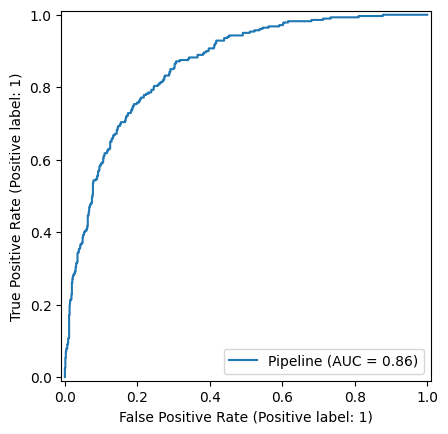

In [43]:
#Prédiction sur les données de test 

x_test,y_test=test.drop('Churn',axis=1),test['Churn']
y_predict_model=loaded_model.predict(x_test)

#Classificaion repport 
print(classification_report(y_test,y_predict_model))

#Courbe ROC 

roc_plot=RocCurveDisplay.from_estimator(loaded_model,x_test,y_test)
